1. Distribution of Content Type

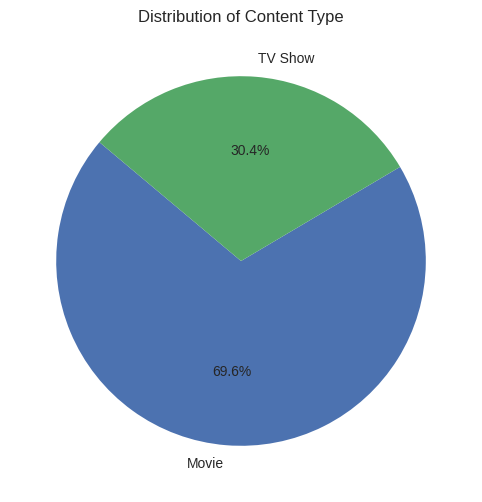

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data as in the previous steps
df = pd.read_csv('netflix_titles.csv')
df['type'] = df['type'].fillna('Unknown')

# Plot Content Type Distribution
content_type = df['type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(content_type.values, labels=content_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Type')
plt.show()


2. Top 5 Production Countries

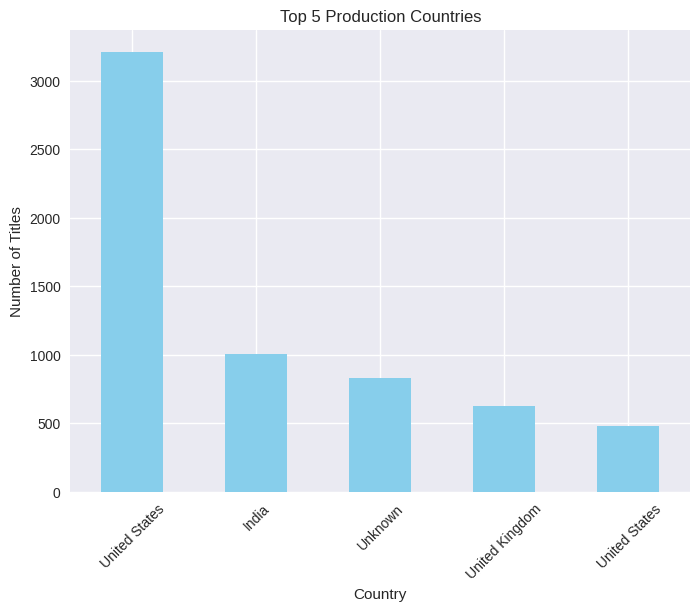

In [7]:
# Split the 'country' column by commas and expand to individual rows
countries = df['country'].fillna('Unknown').str.split(',', expand=True).stack().value_counts().head(5)

# Plot Top 5 Countries
plt.figure(figsize=(8, 6))
countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Production Countries')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


3. Content Release Trend by Year

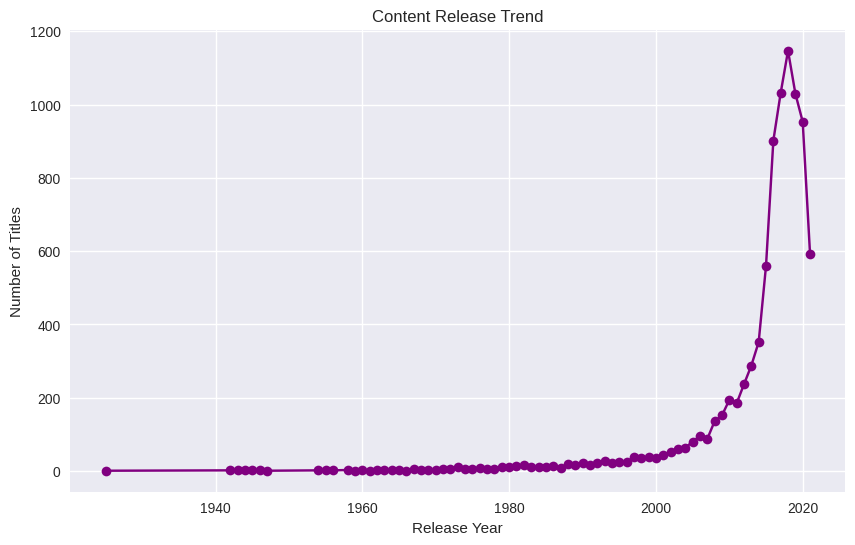

In [8]:
# Count titles per release year and sort by year
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
year_counts = df['release_year'].dropna().value_counts().sort_index()

# Plot Release Year Trend
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, color='purple', marker='o', linestyle='-')
plt.title('Content Release Trend')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


4. Top 5 Content Ratings

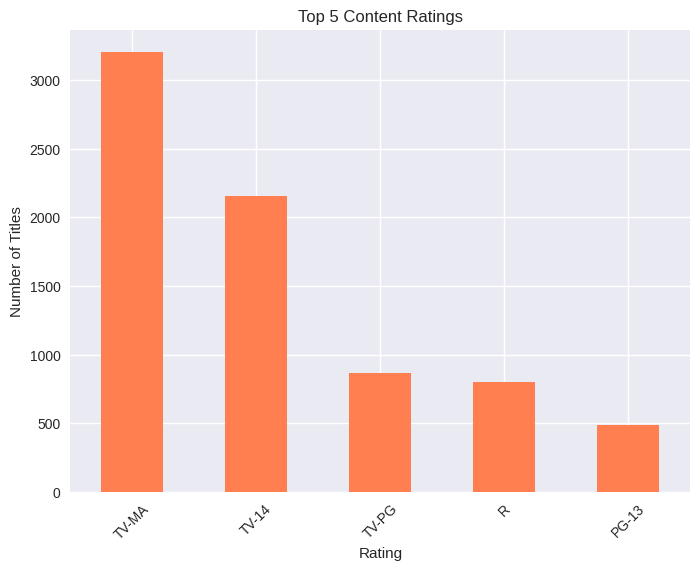

In [9]:
# Count ratings and get the top 5
ratings = df['rating'].fillna('Not Rated').value_counts().head(5)

# Plot Top 5 Ratings
plt.figure(figsize=(8, 6))
ratings.plot(kind='bar', color='coral')
plt.title('Top 5 Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


5. Top 10 Genres

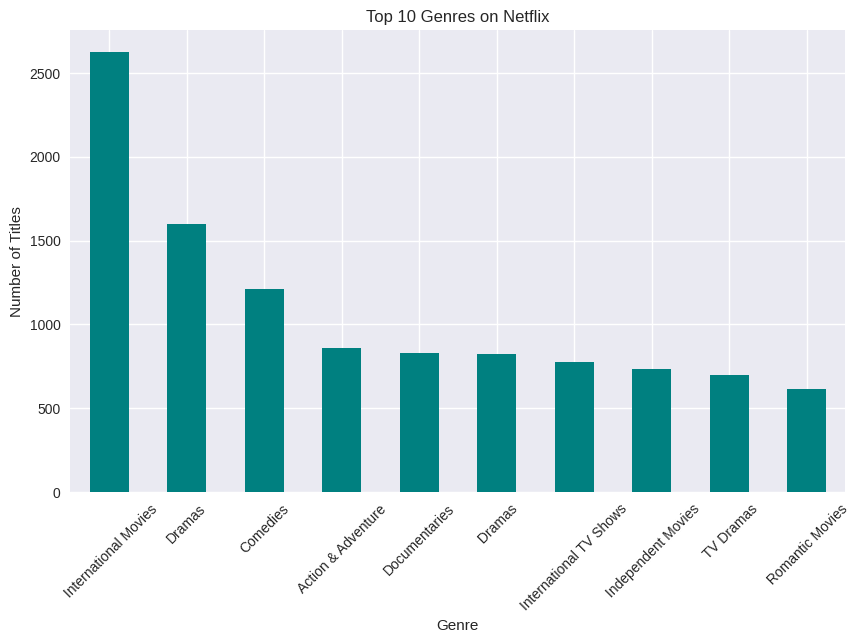

In [10]:
# Split 'listed_in' column by commas and expand into individual rows
genres = df['listed_in'].str.split(',', expand=True).stack().value_counts().head(10)

# Plot Top 10 Genres
plt.figure(figsize=(10, 6))
genres.plot(kind='bar', color='teal')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


6. Duration Distribution for Movies and TV Shows

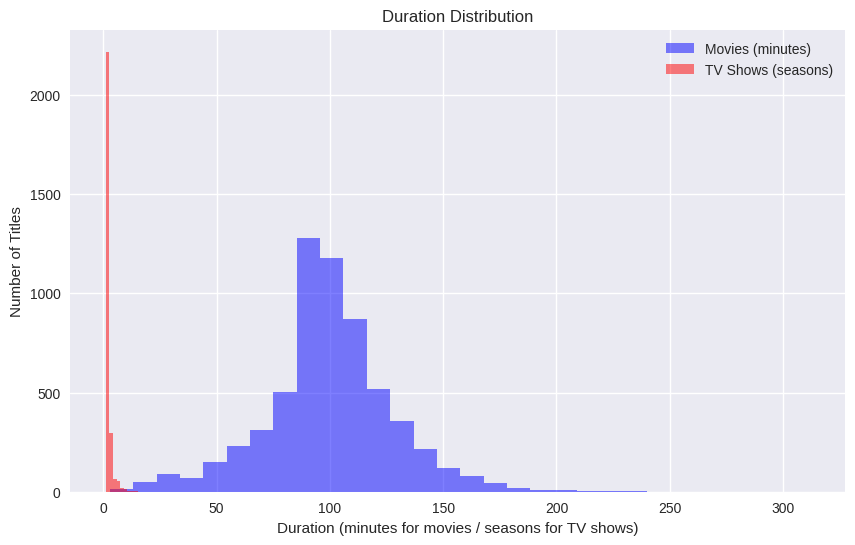

In [11]:
# Extract numeric values from the 'duration' column for movies and TV shows
movies_duration = df[df['type'] == 'Movie']['duration'].str.extract('(\d+)').astype(float)
tv_duration = df[df['type'] == 'TV Show']['duration'].str.extract('(\d+)').astype(float)

# Plot Duration Distribution
plt.figure(figsize=(10, 6))
plt.hist(movies_duration.dropna(), bins=30, alpha=0.5, label='Movies (minutes)', color='blue')
plt.hist(tv_duration.dropna(), bins=10, alpha=0.5, label='TV Shows (seasons)', color='red')
plt.legend()
plt.title('Duration Distribution')
plt.xlabel('Duration (minutes for movies / seasons for TV shows)')
plt.ylabel('Number of Titles')
plt.show()
